In [4]:
# reqeusts, bs4 import
import requests
import bs4
from bs4 import BeautifulSoup

In [ ]:
# 1-1 Daum 뉴스기사 제목 스크래핑하기
def list_news(catalog):

    #req_param = {'catalog' : 'economy'}
    #url = 'https://news.daum.net/{catalog}'.format(**req_param)
    url = f'https://news.daum.net/{catalog}'

    #header 설정
    req_header = {
        'user_agent' : 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/135.0.0.0 Safari/537.36'
    }

    # requests get호출
    res = requests.get(url, headers=req_header)
    res.encoding = 'utf-8'

    if res.ok :
        html = res.text
        soup = BeautifulSoup(html, 'html.parser')
        
        
        # CSS 선택자
        a_tag_list = soup.select("li a[href*='v.daum.net/v']")  # div.cont_thumb strong.tit_txt
        #li_tag_list = soup.select("ul.list_newsheadline2 li")
        
        
        print(f'{url}')
        print(type(res))
        print(res.status_code)
        print(f'{type(a_tag_list)} {len(a_tag_list)}')
        
        # <a> 태그 리스트 순회하기
        for a_tag in a_tag_list:
            #print(type(a_tag))
            #a_tag = li_tag.find('a')
            
            title = a_tag.select_one("div.cont_thumb strong.tit_txt").text.strip()
            #strong_tags = li_tag.select('div.cont_thumb strong.tit_txt')
            if strong_tags: # tag가 있는지 여부를 확인하고 인덱스 0을 꺼내는 게 좋다
                strong_tag = strong_tags[0]

            #strong_tag = li_tag.select_one('div.cont_thumb strong.tit_txt')

            # href 속성의 값을 가져오기
            link = a_tag['href']
            print(f'{link}\n{title}')
    else :
        print(f'Error code : {res.status_code}');


list_news('economy')

https://news.daum.net/economy
<class 'requests.models.Response'>
200
<class 'bs4.element.ResultSet'> 80
https://v.daum.net/v/20250408161553109
트럼프발 주가폭락에 동아 "경제적 핵전쟁" 조선 "금융위기 후 최악"
https://v.daum.net/v/20250408160526681
공황과 격변의 판도라 박스가 열리다
https://v.daum.net/v/20250408154329660
해외서 발 뺀 이중항체, 韓 기업들이 이끈다
https://v.daum.net/v/20250408153003030
탄핵 끝났는데 韓경제 ‘봄’은 언제 오나…박근혜 때와 다른 이유
https://v.daum.net/v/20250408152923007
경상수지 흑자행진에도… 한은 “美 관세에 불확실성 확대”
https://v.daum.net/v/20250408144527816
국제유가 하락에 흔들리는 정유업계…실적 먹구름 짙어진다
https://v.daum.net/v/20250408140753767
조양호 한진그룹 선대회장 6주기… ‘45년 항공산업’ 리더십 재조명
https://v.daum.net/v/20250408140302580
미국 최대 은행이 "여성 경영인이 경제 원동력"이라 말한 이유
https://v.daum.net/v/20250408124446384
불평등 부채질하는 재난: 환경부는 약자 비명 듣고 있나요?
https://v.daum.net/v/20250408164759375
송미령 "민관 '원팀'으로 미국 상호관세 파고 넘을것"(종합)
https://v.daum.net/v/20250408164507255
경과원, 베트남서 남양주 우수기업 기술력 입증 지원
https://v.daum.net/v/20250408164102073
금융위 "잠재성장률 하락·인구구조 변화 속 자본시장 역할 더욱 중요"
https://v.daum.net/v/202504081640550

In [6]:
# 1-2 뉴스기사의 링크와 제목 스크래핑 및 출력

section_dict = {'기후/환경':'climate','사회':'society','경제':'economy','정치':'politics',\
             '국재':'world','문화':'culture','생활':'life','IT/과학':'tech','인물':'people'}

# 함수선언
def print_news(section_name):
    #section = section_dict[section_name]    # KeyError 발생
    section = section_dict.get(section_name)
        
    if section is None:
        print('요청하신 Key가 없습니다.')
    else:
        url = f'https://news.daum.net/{section}'
        
        #header 설정
        req_header = {
            'user_agent' : 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/135.0.0.0 Safari/537.36'
        }

        # requests get호출
        res = requests.get(url, headers=req_header)
        res.encoding = 'utf-8'

        if res.ok :
            html = res.text
            soup = BeautifulSoup(html, 'html.parser')
            
            # CSS 선택자
            a_tag_list = soup.select("li a[href*='v.daum.net/v']")  # div.cont_thumb strong.tit_txt
            
            print(f'======> {url} {section_name} 뉴스 <======')

            # <a> 태그 리스트 순회하기
            for a_tag in a_tag_list:
                title = a_tag.select_one("div.cont_thumb strong.tit_txt").text.strip()

                link = a_tag['href']
                print(f'{link}\n{title}')
        else :
            print(f'Error code : {res.status_code}');



# 함수호출
#print_news('경제')
print_news('인물2')


요청하신 Key가 없습니다.


nate 뉴스 기사 : 성공! 200
selction_name : https://news.nate.com/recent?mid=n0300

기사 제목 : 스포티한 패밀리카의 정석…'더 뉴 아우디 Q6 e-트론'[시승기]
기사 링크 : https://news.nate.com/view/20250409n20674?mid=n0300



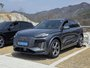

기사 제목 : "당국과 협상력 높인다"…건설협회, 대형사 이사 영입 추진
기사 링크 : https://news.nate.com/view/20250409n20654?mid=n0300



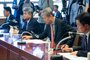

기사 제목 : [속보] 코스피, 장중 2300선 붕괴
기사 링크 : https://news.nate.com/view/20250409n20652?mid=n0300



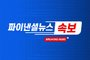

기사 제목 : [한경유레카 특징주] 한화오션, 실적향상 기대에도 적정 기업가치 상승 여력은 부족
기사 링크 : https://news.nate.com/view/20250409n20651?mid=n0300



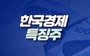

기사 제목 : [속보]코스피 장중 2,300선 붕괴…코스닥도 650 하회
기사 링크 : https://news.nate.com/view/20250409n19967?mid=n0300



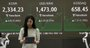

기사 제목 : 유에이치씨 그룹, 지난해 매출 360억원 돌파
기사 링크 : https://news.nate.com/view/20250409n16092?mid=n0300



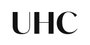

기사 제목 : 이재용, 일본 출장 마치고 귀국…'관세 압박' 속 보폭 확대
기사 링크 : https://news.nate.com/view/20250409n20640?mid=n0300



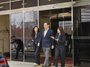

기사 제목 : [속보] 트럼프, 약 60개국 추가 상호관세 예정대로 발효…韓 25%
기사 링크 : https://news.nate.com/view/20250409n19849?mid=n0300

기사 제목 : 韓 25%, 中 104% 상호관세 부과…코스피, 결국 2300선 깨졌다
기사 링크 : https://news.nate.com/view/20250409n19711?mid=n0300



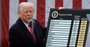

기사 제목 : 클로바인, 프로젝트·팀 관리부문 글로벌 1위 "경쟁력 입증"
기사 링크 : https://news.nate.com/view/20250409n20608?mid=n0300



기사 제목 : 다날 '화이트라벨링', 선불업 운영 기준 변화에 기업 도입 문의 급증
기사 링크 : https://news.nate.com/view/20250409n20595?mid=n0300



기사 제목 : 폴란드서 역대 최대 규모 'K9 유저클럽'…美도 관심
기사 링크 : https://news.nate.com/view/20250409n06820?mid=n0300



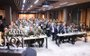

기사 제목 : 풀무원, 건강 환경 다 잡았다…두유로 만든 '메밀두유면' 출시
기사 링크 : https://news.nate.com/view/20250409n13246?mid=n0300



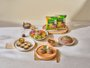

기사 제목 : 필리핀서 다시 한 번 증명된 K-푸드 파워
기사 링크 : https://news.nate.com/view/20250409n20559?mid=n0300



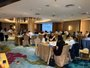

기사 제목 : 쿠팡, 봄나들이 먹거리 4700개 최대 53% 할인
기사 링크 : https://news.nate.com/view/20250409n20558?mid=n0300



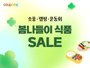

기사 제목 : [머닝(Money-Ing)] 미국 2공장 가동 관세 노이즈 "오히려 좋아" 실적 상향되는 화장품 픽?
기사 링크 : https://news.nate.com/view/20250409n20557?mid=n0300

기사 제목 : [속보] 코스피 장중 2300선 붕괴…트럼프 관세 폭탄에 '패닉'
기사 링크 : https://news.nate.com/view/20250409n19789?mid=n0300



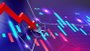

기사 제목 : 신한은행, 중소기업중앙회와 상생지원금 지원사업 실시
기사 링크 : https://news.nate.com/view/20250409n20537?mid=n0300



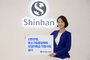

기사 제목 : 태성, 복합동박 장비 양산 본격화…충남 산업단지 내 임대공장 계약 체결
기사 링크 : https://news.nate.com/view/20250409n20536?mid=n0300



기사 제목 : [김민수의 잠금해제] 카지노 3사 조용히 터지는 호실적 금리 부담 벗은 최선호주?
기사 링크 : https://news.nate.com/view/20250409n20535?mid=n0300



In [11]:
# Nate 뉴스기사 제목 스크래핑하기
import os
from urllib.parse import urljoin
from IPython.display import Image, display
import requests
from bs4 import BeautifulSoup


section_dict = {'최신뉴스':100, '정치':200, '경제':300, '사회':400, '세계':500, 'IT/과학':600}

# 함수선언
def print_news(section_name):
    section = section_dict[section_name]
    url = f'https://news.nate.com/recent?mid=n0{section}'
    req_header = {
        'user_agent' : 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/135.0.0.0 Safari/537.36',
        'referer': url
    }
    
    res = requests.get(url, headers=req_header)
   
    print(f'nate 뉴스 기사 : 성공! {res.status_code}')
    print(f'selction_name : {url}\n')

    if res.ok:
        html = res.text
        soup = BeautifulSoup(html, 'html.parser')
        a_tag_list = soup.select("div.mlt01 a.lt1") #span.tb h2.tit
                
        
        for a_tag in a_tag_list:
            link = a_tag['href']
            title = a_tag.select_one("span.tb h2.tit").text.strip()
            
            print(f'기사 제목 : {title}\n기사 링크 : https:{link}\n')
            
            image_tags = a_tag.select("img[src*='news.nateimg.co.kr/orgImg']")
            if image_tags:
                img_src = image_tags[0].get('src')
                img_url = urljoin('http:', img_src)
                display(Image(img_url))
    else:
        print(f'Error code : {res.status_code}')


#print_news('최신뉴스')
print_news('경제')

In [ ]:
#그냥 해봄

def print_news():
    url = "https://finance.naver.com/news/"
    
    req_header = {
        'user_agent' : 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/135.0.0.0 Safari/537.36'
    }
    
    res = requests.get(url, headers=req_header)
    
    if res.ok:
        html = res.text
        soup = BeautifulSoup(html, 'html.parser')
        a_tag_list = soup.select("div.main_news ul li a[href*='article']")
        
        
        print(len(a_tag_list))
      
        for a_tag in a_tag_list:
            title = a_tag.text.strip()
            print(type(a_tag))
            print(f'article title : {title}')
    else:
        print(f'Error message : {res.status_code}')

print_news()

6
<class 'bs4.element.Tag'>
article title : 소액주주 달래기 나선 한화...오너家 유상증자 할인은 없다
<class 'bs4.element.Tag'>
article title : '둘쑥날쑥' 국장에도-…"동학개미, 저가 매수 옳다"
<class 'bs4.element.Tag'>
article title : SK '5조원 가치' SK실트론 매각 물밑타진
<class 'bs4.element.Tag'>
article title : SK그룹 'SK실트론' 한앤컴퍼니에 매각 타진
<class 'bs4.element.Tag'>
article title : 개미는 삼성전자를 담는다…"실적 좋은데" vs "美 관세 봐야"
<class 'bs4.element.Tag'>
article title : 역사적 낙폭 진입한 S&P500…과거 공포 이후 수익률 살펴보니
